In [1]:
import numpy as np
from scipy import stats
import pandas as pd

In [4]:
pd.set_option('display.float_format', lambda x: '%.3f' % x)
pd.set_option('display.precision',3)
pd.set_option('display.max_rows',2000)
pd.set_option('display.max_columns',2000)

In [6]:
import seaborn as sn 
import matplotlib.pyplot as plt
import matplotlib.style as psl 
from mpl_toolkits.axes_grid1 import host_subplot
# 样式复制 ggplot
psl.use('ggplot') 
# 刻度方向配置
plt.rcParams['xtick.direction'] = 'out' 
plt.rcParams['ytick.direction'] = 'inout' 
# 字体配置--支持中文
plt.rcParams['font.sans-serif']=['SimHei','YouYuan']
# 显示负号
plt.rcParams['axes.unicode_minus']=False # 负数
plt.rcParams['figure.figsize'] = (8.0, 4.0) # 设置figure_size尺寸
plt.rcParams['savefig.dpi'] = 300 # 保存的图片像素
plt.rcParams['figure.dpi'] = 300 #分辨率
plt.rcParams['image.interpolation'] = 'nearest' # 设置 interpolation style
plt.rcParams['image.cmap'] = 'gray' # 设置 颜色 style

# 概率分布

## 离散分布

### 二项分布 X~B(n,p)

$$ f(k,n,p)={n \choose k}p^k(1-p)^{n-k}$$

- 结果只有2种情况，正或负
- n次试样中，有k次正样本被选中，k为随机变量值;  k in {0,1,2,... ,n}
- 正样本发生的概率为p  0<=p<=1
- E(X)=np  D(X)=np(1-p)
- n,p 均为参数

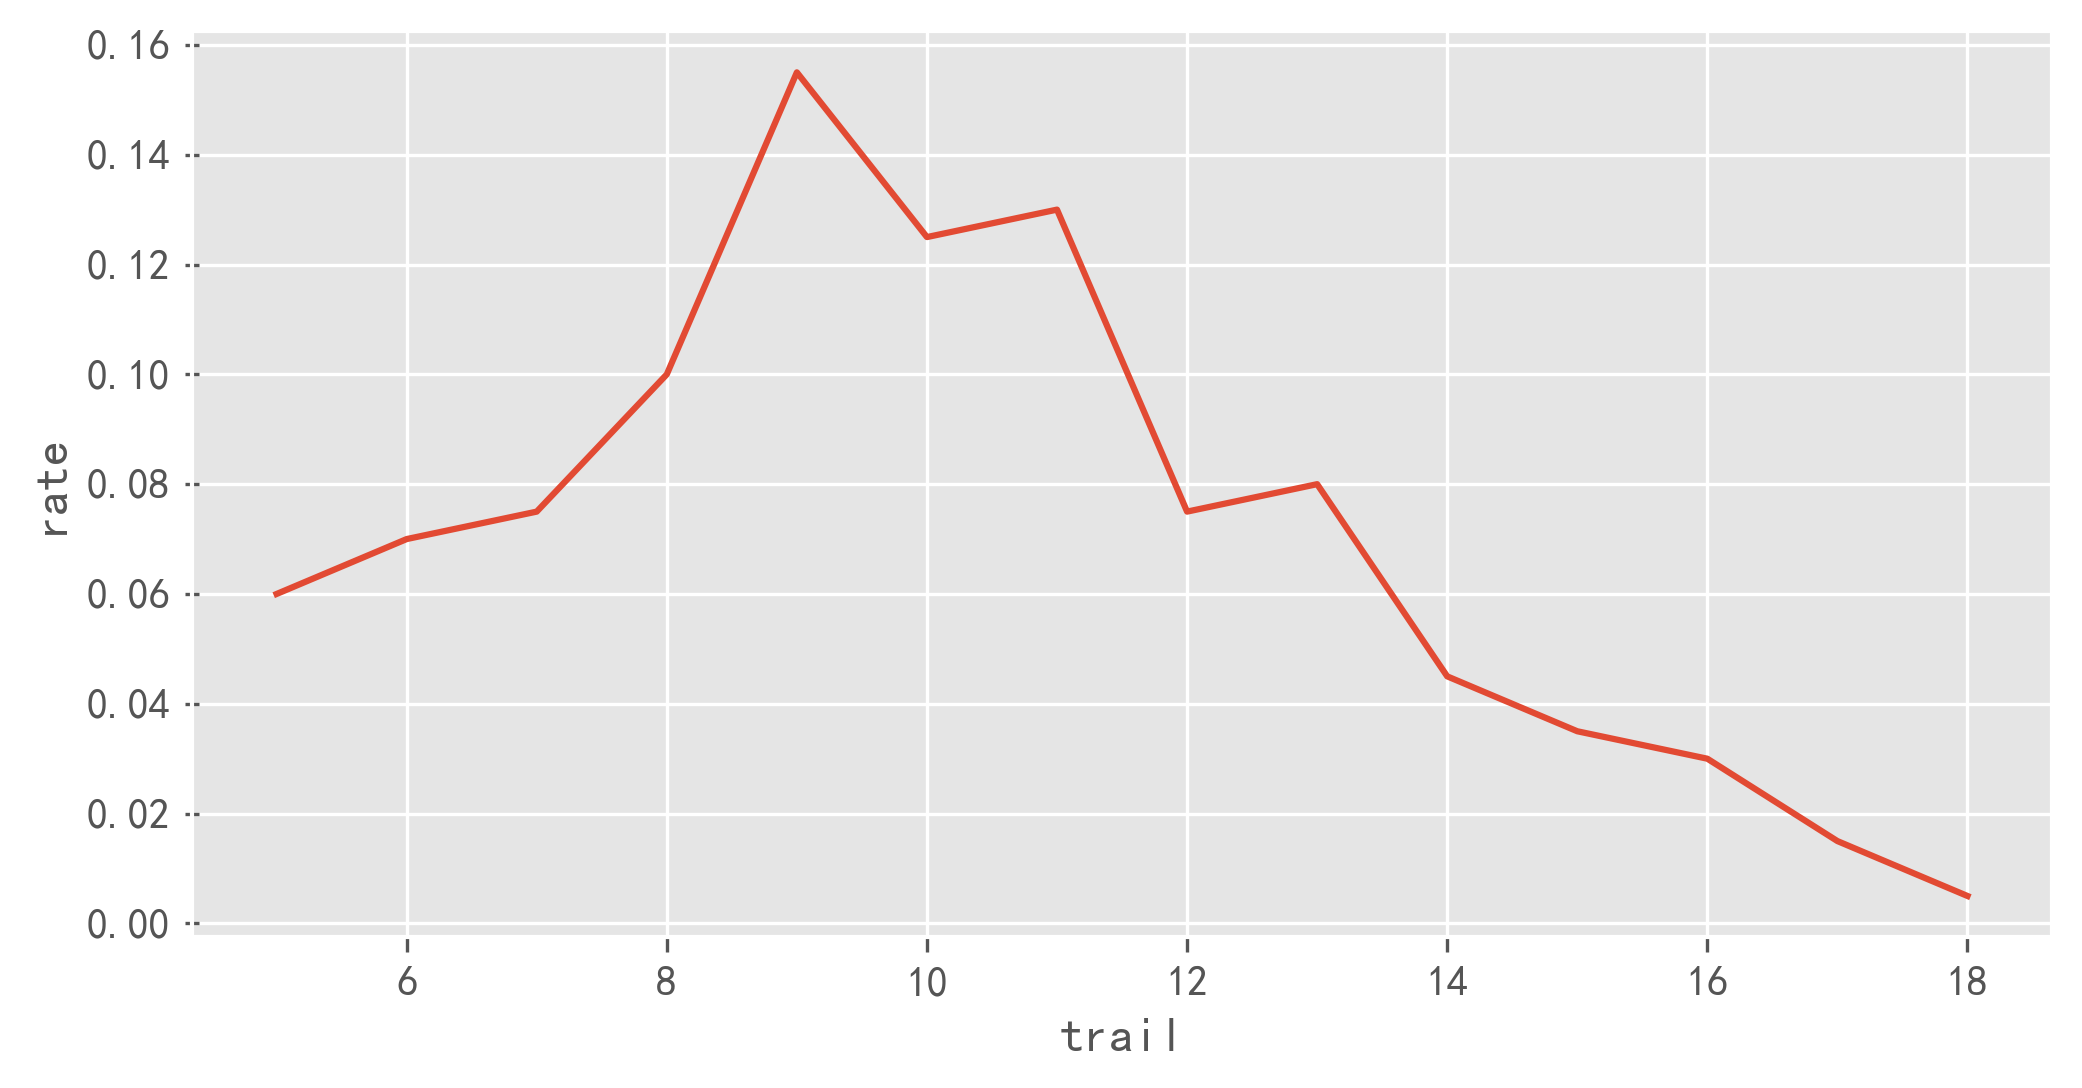

In [8]:
# 100枚硬币，向上的概率假设为0.1，进行200次试验，
# 1次试验指100枚硬币都做抛的操作
# 1次试验中硬币向上的硬币个数，取值范围是[0,100]
a=np.random.binomial(100,0.1,200)
a=pd.DataFrame(a,columns=['trail'])
# 200次试验中，出现trail 的概率是 trail / 200
# 对应的公式中，n=200,k=x轴的数据，即trail 值，概率=y轴的值
a = a.groupby('trail').size().reset_index().rename(columns={0:'cnt'})
a['rate']=np.round(a['cnt']/200,3)
sn.lineplot(x='trail',y='rate',data=a)

In [ ]:
loc 指偏移(Shifting)，一般是均值+loc
scale 缩放(Scaling),针对标准差的缩放

In [22]:
stats.binom.stats(loc=3, n=100,p=0.5,moments = 'mvk')

(array(53.), array(25.), array(-0.02))

In [19]:
stats.binom.pmf((1,2,3),n=100,p=0.5,loc=2)

array([0.00000000e+00, 7.88860905e-31, 7.88860905e-29])

In [17]:
stats.binom.ppf(0.3, 5, 0.5,loc=2)

4.0

In [ ]:
stats.binom.cdf(0.01, 5, 0.5)

In [12]:
# 概率质量函数
stats.binom(n=100,p=0.1,size=200,random_state=1024)

TypeError: _parse_args() got an unexpected keyword argument 'size'

### 泊松分布

$$ f(\lambda,k)=\frac {e^{-\lambda}\lambda^k}{k!}$$

- 概率质量函数
- 单位时间内随机事件发生次数的概率分布
- $\lambda$ 均值，单位时间内平均发生的次数
- 随机变量发生k次时，发生的概率


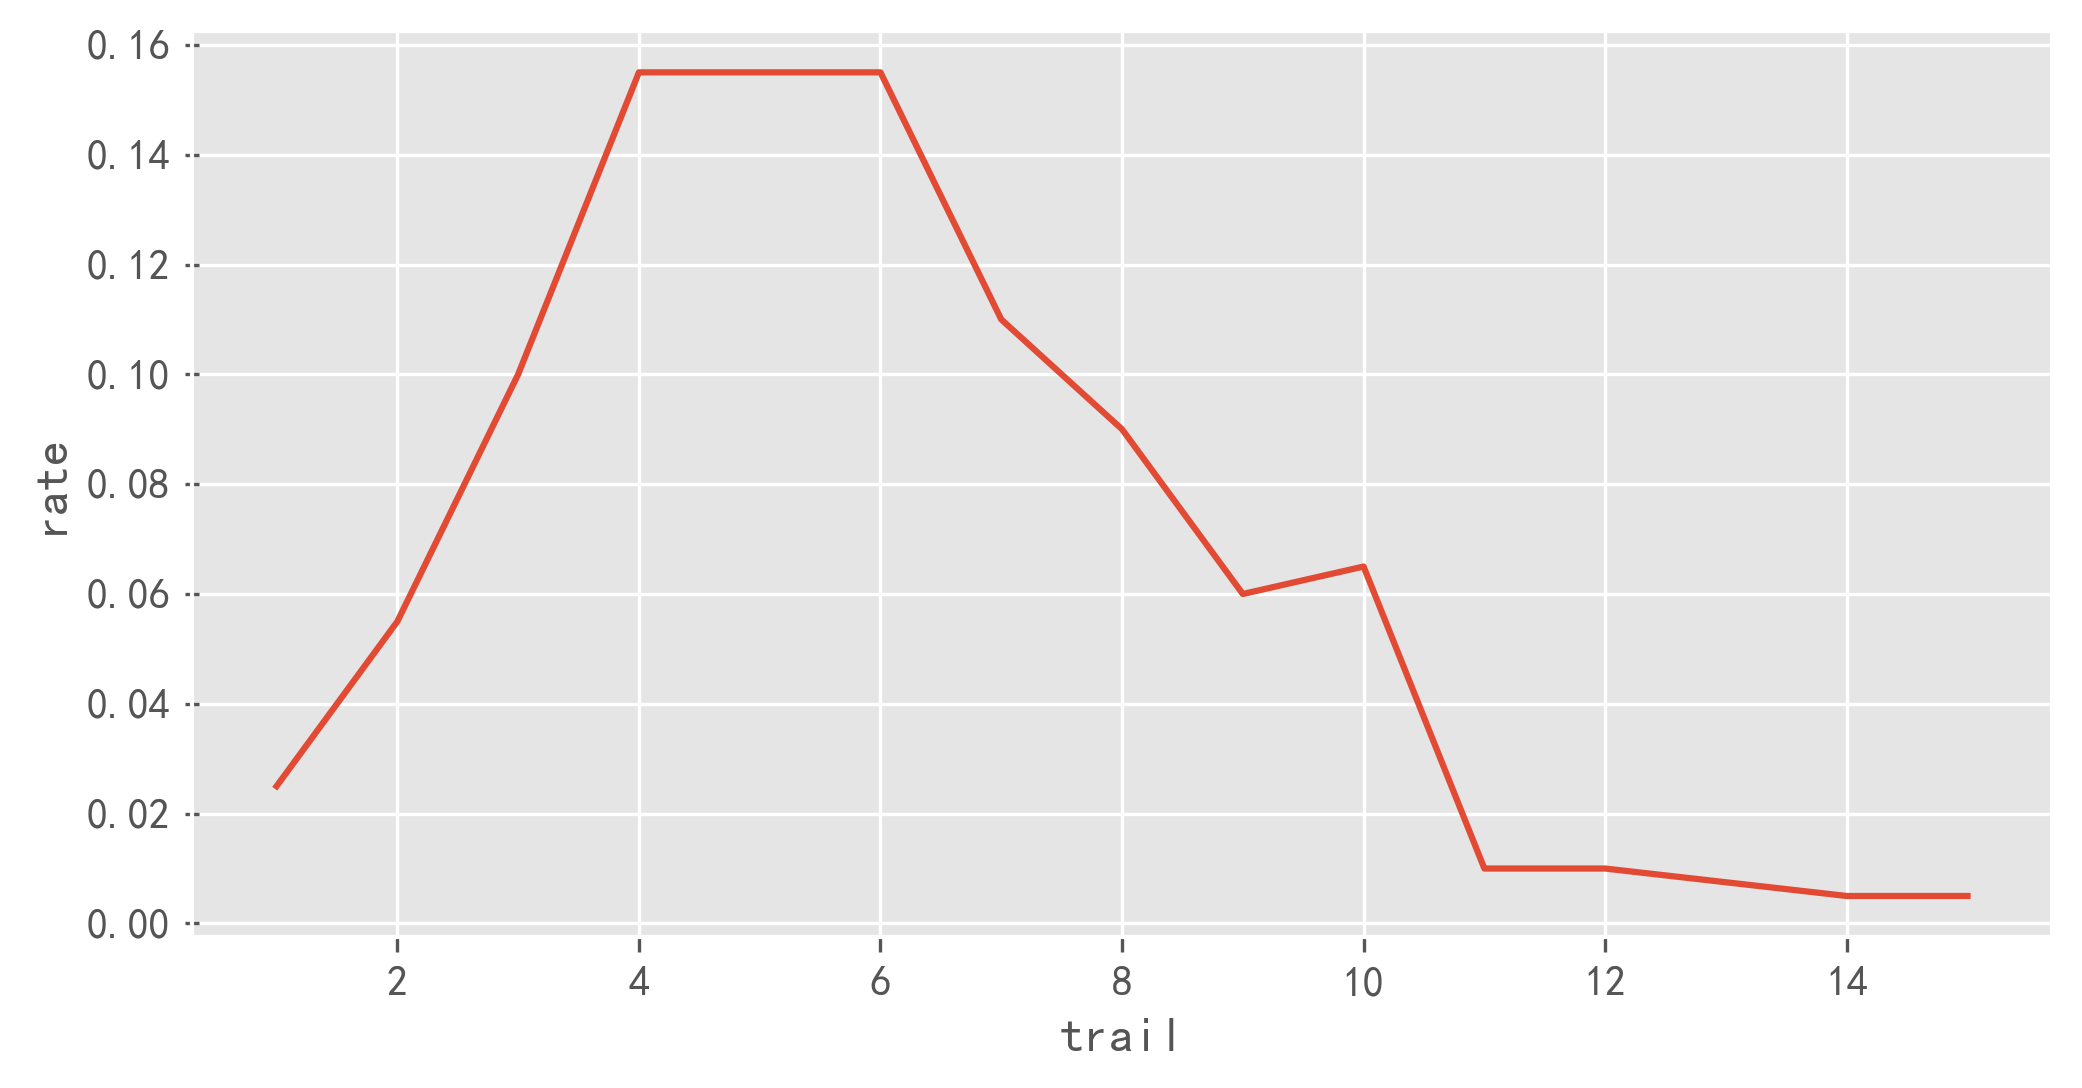

In [11]:
# 假设公交车每小时平均通过6辆，200个样本,每个样本服从泊松分布
a=np.random.poisson(6,size=200)
a=pd.DataFrame(a,columns=['trail'])
a = a.groupby('trail').size().reset_index().rename(columns={0:'cnt'})
# 发生k次时，发生的概率；
a['rate']=np.round(a['cnt']/200,3)
sn.lineplot(x='trail',y='rate',data=a)

## 连续分布

### 指数分布

$$ f(\lambda ,x) =\lambda e^{-\lambda x} \quad x>=0$$

- 概率密度函数
- 独立随机事件发生的时间间隔
- $\lambda$ 参数，平均间隔时长=总时长/发生的次数

# 参数估计

- 变量分为单变量或多变量，多变量可看作向量研究
- 变量维度可为离散变量或连续型变量
- 变量的分布多种多样，如果变量服从某一种分布，则该分布函数中的参数说的是总体样本的参数
- 参数估计即为使用部分样本估计总体分布的参数
- 比如正态分布中的均值和方差，即为参数

In [ ]:
# 正太分布置信区间估计
def norm_confidence(data_list,)

# 样本量估计

## 指标为分类

计算公式
$$ n=\frac {(1+\frac 1k)(\mu_{\alpha} + \mu_{\beta})^2p(1-p)}{\delta^2} $$ 

$$
p=\frac {p_1+kp_2}{1+k} ,p_1 对照组概率,p_2 实验组概率 \\ 
k=对照组数/实验组数,如果两组样本比例一致，则k=1 \\
\delta = (p_2-p_1) \\ 
\mu_{\alpha} , u值表，根据单侧双侧进行查询值 \\
\mu_{\beta} , u值表，根据单侧双侧进行查询值 
$$

## 指标为均值

计算公式
$$ n=\frac {2(\mu_{\alpha} + \mu_{\beta})^2(1+\frac 1k)\sigma^2}{\delta^2} $$

$$
\sigma 总体方差，可用样本方差代替 \sigma^2={(s_1^2 + s_2^2) \over 2} \\
s_1 对照组标准差，s_2 实验组标准差 \\
\delta=实验组均值-对照组均值的绝对值
$$